# Resampling Datetime Data
Kailin Kleintjes
___

Original data source: https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

# Part One

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 1.Convert the date column to datetime dtype.

In [2]:
df['date'] = pd.to_datetime(df['date'], format= '%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## 2. Set the date column as the index.

In [3]:
df = df.set_index('date')


In [4]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 3. Filter out only the required data:
Keep only data from the year 2000 or later.

Keep only the following features:
precipitation
mean_temp
min_temp
max_temp
snow_depth

In [5]:
df =df.loc['2000':, ['precipitation', 'mean_temp','min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## 4. Impute any missing values.

In [6]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['precipitation'] = df['precipitation'].ffill()
df['snow_depth'] = df['snow_depth'].ffill()

In [8]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part Two

## Q1: What month had the most precipitation between 2000 through 2010?

In [9]:
#create a copy of the data frame to have only the years from 2000-2010
pr = df.loc['2000':'2010']
pr

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0


In [10]:
#drop every column but the precipitation column
pr = pr.drop(['max_temp', 'mean_temp', 'min_temp', 'snow_depth'], axis=1)
pr

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [11]:
#resample the precipitation column to a monthly frequency using .sum() as the aggregation method
pr = pr.resample("MS").sum()
pr.name = 'Resampled'
pr.head()

,precipitation
date,
2000-01-01,14.3
2000-02-01,62.2
2000-03-01,13.6
2000-04-01,74.2
2000-05-01,68.6


In [12]:
#find the date and corresponding value for the max precipitation
max_pre = pr.idxmax()
pr.loc[max_pre]

,precipitation
date,
2000-10-01,166.4


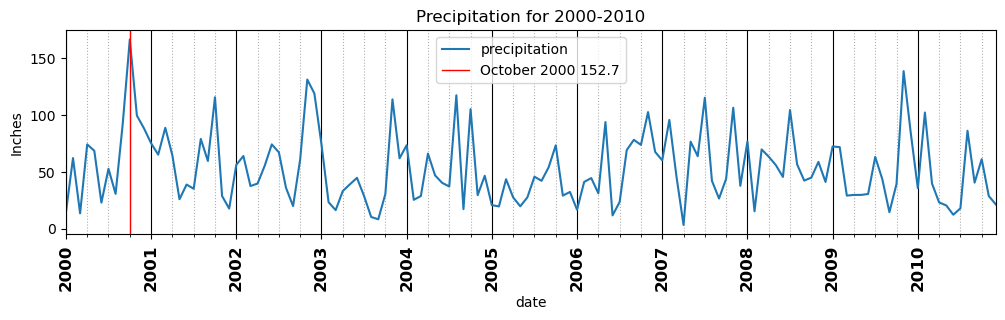

In [13]:
fig, ax = plt.subplots(figsize=(12,3))
pr.plot(ax=ax,title='Precipitation for 2000-2010',ylabel='Inches');
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ); 
ax.axvline("2000-10-01",color='red',lw=1, label='October 2000 152.7')
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend();

The month of October in the year 2000 had the most precipitation from the years 2000-2010 with a precipitation of 152.7 inches.

In [14]:
#create a copy of the dataframe and drop every column but the mean temp
copy=df.copy()
copy = copy.drop(['max_temp', 'min_temp', 'precipitation', 'snow_depth'], axis=1)
copy.head()

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4


In [15]:
#resample to a yearly frequency using .mean() as the aggregation method
copy = copy.resample("A").mean()
copy.head()

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683


In [16]:
#find the year for the lowest mean temperature
min_temp = copy.idxmin()
copy.loc[min_temp]

,mean_temp
date,
2010-12-31,10.657397


In [17]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 12 months.
loc_12months = mdates.MonthLocator(interval=12)
## for major year ticks
loc_year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")

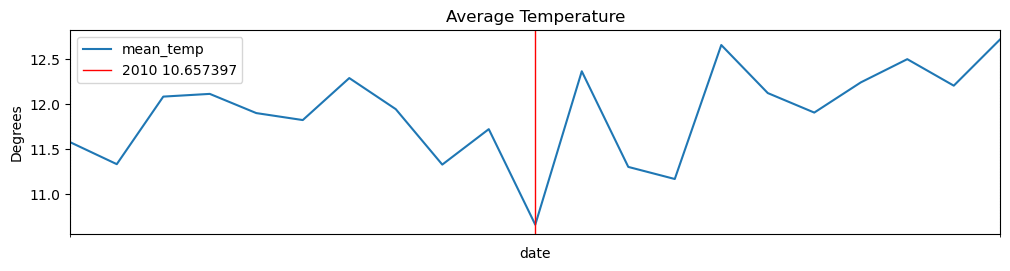

In [18]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
copy.plot(ax=ax,title='Average Temperature',ylabel='Degrees');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
ax.axvline("2010-12-31",color='red',lw=1, label='2010 10.657397')
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_12months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend();

In [19]:
The year 2010 had the collest average temperature at 10.657397 degrees

SyntaxError: invalid syntax (3176982111.py, line 1)